## Описание проекта
### Контекст
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

<b> Часть 1. Приоритизация гипотез.</b>
- В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача

Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [1]:
import pandas as pd
try:
    hypothesis = pd.read_csv(r"C:\Users\rpash\Desktop\шпаргалки\hypothesis.csv")
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [2]:
pd.options.display.max_colwidth = 150

In [3]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
display(hypothesis[['Hypothesis', 'ICE']].sort_values(by=['ICE'], ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


При построении гипотез мы видим, что  наибольший потенциал у 8, 0, 7.
Высокий Impact ('влияние') и низкий Efforts('усилия'), обеспечивают высокий приоритет для этих задач

In [4]:
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']) / hypothesis['Efforts']

print(hypothesis[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False))

                                                                                                     Hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

При расчете RICE преоритеты немного сдвигаються, за счет высокого Reach ('охват'), теперь приоритетны 7, 2, 0, 6 ( таким образом у нас добавились гипотезы 2 и 6)

### Вывод:
 Методы ICE/RICE хорошо работают, когда нужно запустить новый продукт на существующем рынке. Если вы хотите внедрить дополнительный канал обслуживания клиентов и собираетесь проверить гипотезы о том, как клиенты привыкли получать сервис в данный момент.
 При применении метода ICE основыне гипотезы были:
 - Запустить акцию, дающую скидку на товар в день рождения	
 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
 Они соотвестуют 2 ключевым показателя низкая стоимость внедрения + высокая ценность для клиентов.
 
 При применении метода RICE:
 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
 При добавлении показателя "Reach" (охват), приоритетные гипотезы сдвигаются, за счет того количества клиентов которых коснуться нововведения и их реакции.

## Часть 2. Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

### Задача
Проанализируйте A/B-тест:
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего количества заказов по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Примите решение по результатам теста и объясните его.
Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

In [5]:
# Необходимые библиотеки для исследования 
from datetime import datetime, timedelta
import numpy as np    
from scipy import stats as st
import seaborn as sns
from IPython.display import display
from matplotlib import pyplot as plt

In [6]:
try:
    orders = pd.read_csv(r"C:\Users\rpash\Desktop\шпаргалки\orders.csv")
except:
    orders = pd.read_csv('/datasets/orders.csv')

In [7]:
try:
    visitors = pd.read_csv(r"C:\Users\rpash\Desktop\шпаргалки\visitors.csv")
except:
    visitors = pd.read_csv('/datasets/visitors.csv')

In [8]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
#для удобства приведем названия столбцов к "змеиному" регистру.
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group'] 
orders.head(5)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
#приведём столбец date к типу datetime
orders['date'] = pd.to_datetime(orders['date'])

In [12]:
#проверим таблицу на наличие дубликатов
orders.duplicated().sum()

0

In [13]:
#посмотрим на среднее, максимальное и минимальное значение в столбце с выручкой.
print(orders['revenue'].mean())
print(orders['revenue'].median())
print(orders['revenue'].min())
print(orders['revenue'].max())

8348.005847953216
2978.0
50
1294500


In [14]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
#приведём столбец date к типу datetime
visitors['date'] = pd.to_datetime(visitors['date'])

In [17]:
#проверим таблицу на наличие дубликатов
visitors.duplicated().sum()

0

In [18]:
visitors.describe()

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [19]:
#проверим совпадают ли даты между таблицами
print(orders['date'].nunique())
print(orders['date'].min())
print(orders['date'].max())

print(visitors['date'].nunique())
print(visitors['date'].min())
print(visitors['date'].max())

31
2019-08-01 00:00:00
2019-08-31 00:00:00
31
2019-08-01 00:00:00
2019-08-31 00:00:00


In [20]:
#проверим распределение между группами А и В
a_users = visitors[visitors['group']=='A']['visitors'].sum()
b_users = visitors[visitors['group']=='B']['visitors'].sum()
print('Пользователи A:',a_users)
print('Пользователи В:', b_users)

Пользователи A: 18736
Пользователи В: 18916


In [21]:
a_users = orders[orders['group']=='A']['visitor_id'].nunique()
b_users = orders[orders['group']=='B']['visitor_id'].nunique()
print('Пользователи A:',a_users)
print('Пользователи В:', b_users)

Пользователи A: 503
Пользователи В: 586


In [22]:
#проверим если пользователи которые опали сразу в обе группы
ab_users = orders.groupby('visitor_id').agg({'group':'nunique'})
ab_users = ab_users.query('group > 1')
ab_users['group'].count()

58

In [23]:
#есть, но их количество не большое, по этому смело их удаляем
# Находим покупателей которые находятся в обеих тестируемых группах
ab_users = (
    orders.groupby('visitor_id', as_index=False) # убираем индексы, а то поучается pd.Series
    .agg({'group':'nunique'})                   # посчитали
    .rename(columns={'nunique':'group'}))       # переименовали

# здесь пользователи которые только в одной группе, убрали всех пользователей которые приносили нам погрешности
ab_users_cl = ab_users.query('group == 1') 
print(ab_users_cl)

      visitor_id  group
0        5114589      1
1        6958315      1
3       11685486      1
4       39475350      1
5       47206413      1
...          ...    ...
1025  4259830713      1
1027  4278982564      1
1028  4279090005      1
1029  4281247801      1
1030  4283872382      1

[973 rows x 2 columns]


In [24]:
orders.merge(ab_users, how='right', left_on='visitor_id', right_on='visitor_id')

,transaction_id,visitor_id,date,revenue,group_x,group_y
0,900025958,5114589,2019-08-16,570,B,1
1,1887336629,6958315,2019-08-04,1490,B,1
2,3679129301,8300375,2019-08-01,10510,B,2
3,4293855558,8300375,2019-08-07,1790,A,2
4,797272237,11685486,2019-08-23,6201,A,1
...,...,...,...,...,...,...
1192,1216533772,4266935830,2019-08-29,78990,B,2
1193,51443164,4278982564,2019-08-05,24744,A,1
1194,2724331495,4279090005,2019-08-04,6716,B,1
1195,3796325351,4281247801,2019-08-25,2640,B,1


В целом, в данных мало пропусков, группы разденный равнозначно (нет перекоса в кол-ве и дублей).

### 2.1 Построение графика кумулятивной выручки по группам.

In [25]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transaction_id' : pd.Series.nunique,
'visitor_id' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 


visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


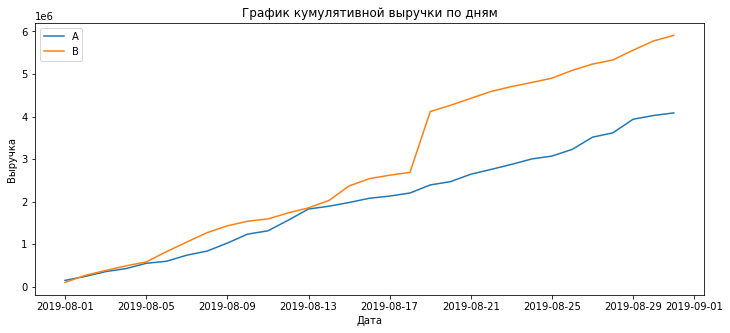

In [26]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по дням') 
plt.legend() 
plt.show()

Вывод:
- Выручка в группе В, начала ледировать с 5-08
- С 18-08 в группе  В резкий скачек выручки( на лицо аномально большой заказ)

### 2.2 Построение графика кумулятивного среднего чека по группам.

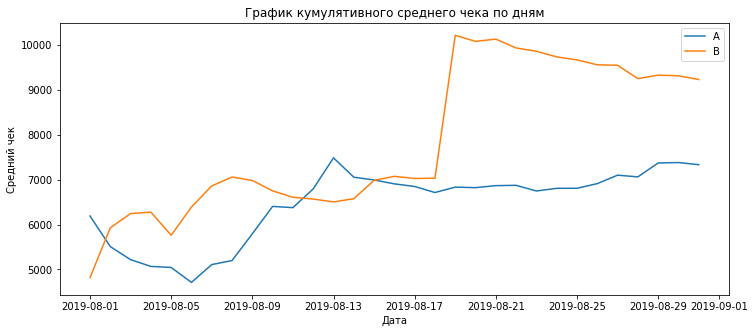

In [27]:
plt.figure(figsize=(12,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по дням') 
plt.legend() 
plt.show()

Вывод:
- Видим схожее движение графиков, так же 18-08 аномально большой заказ в 10000.
- График А, движеться стабильно без всплесков

### 2.3 Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

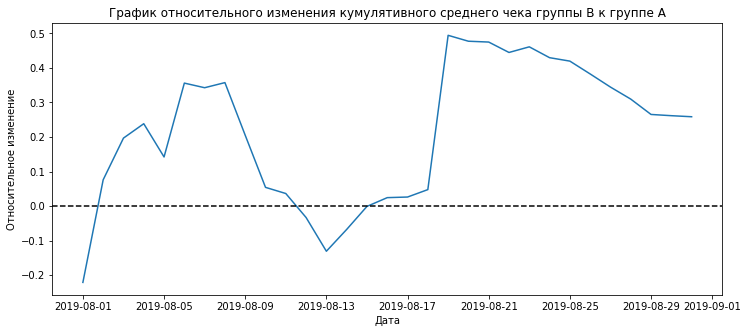

In [28]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A') 
plt.show()

Вывод :
Здесь мы видим относительные различия кумулятивного среднего чека группы B к группе A. Средний чек В сначала рос, в районе 7 августа начал падать, после 13 августа стал расти, и снова виден скачок 18-19 августа. Резкие взлёты и падения могут быть связаны с выбросами - экстремально дорогими или дешевыми заказами

### 2.4 Построение графика кумулятивной конверсии по группам

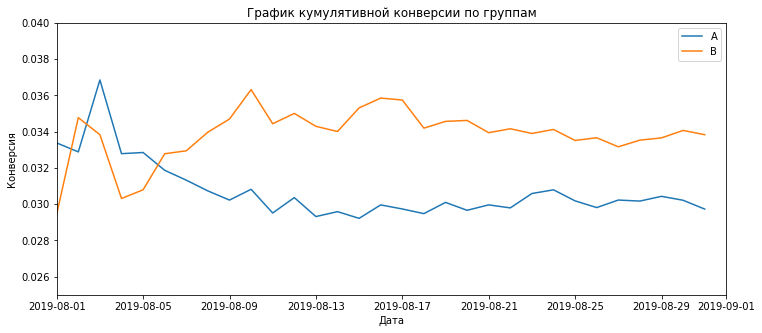

In [29]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(12,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title('График кумулятивной конверсии по группам') 
# задаем масштаб осей
plt.axis([datetime(2019, 8, 1), datetime(2019, 9, 1), 0.025, 0.04])
plt.show()

Вывод:
Движение графиков стабилизируется после 13 августа, к этому времени данные набрали достаточное количество пользователей.

В целом активность пользоватлей Группы В, высше и приростает с 6-7 августа

### 2.5 Построение графика относительного изменения кумулятивной конверсии группы B к группе A

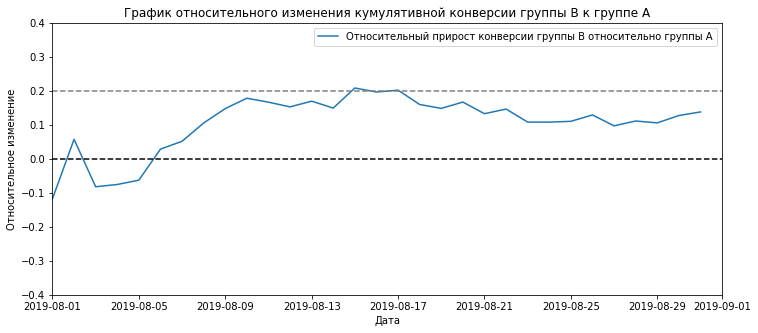

In [30]:
cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([datetime(2019, 8, 1), datetime(2019, 9, 1), -0.4, 0.4])
plt.show()

Вывод:
В начале месяца конверсия группы В была ниже, чем А, после 6 августа стабильно была выше конверсии группы А максимум на 20%, в среднем на 10-15%.

### 2.6 Постройте точечный график количества заказов по пользователям

      visitor_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


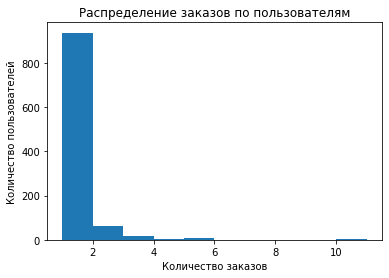

In [31]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
plt.hist(ordersByUsers['orders']) 
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.title('Распределение заказов по пользователям')
plt.show()

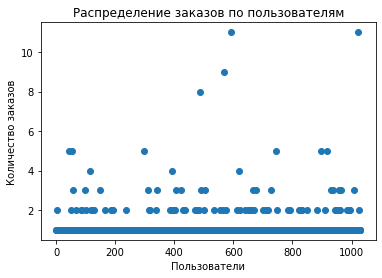

In [32]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
plt.title('Распределение заказов по пользователям')
plt.show()


Вывод:
Из граффиков видно, что стандартными являються до 2 заказов на пользователя. Аномальные всплески больше 8 заказов нарушают граффик

### 2.7 Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [33]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

Вывод: Расчет пенцентиля подтверждает граффик, в норме до 5% отклонения пользователи освершают 2 заказа

### 2.8 Постройте точечный график стоимостей заказов

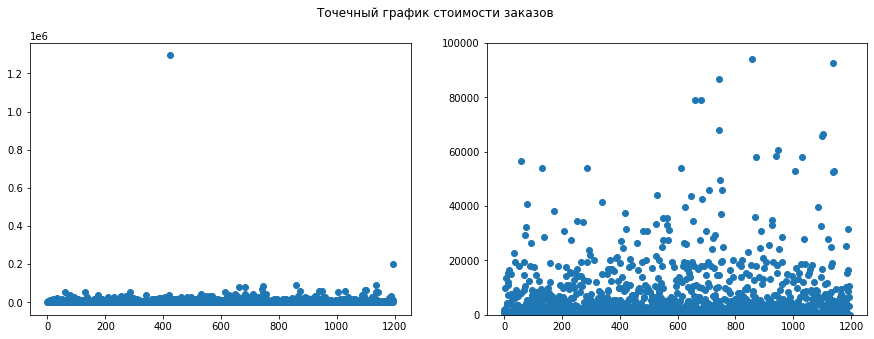

In [34]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5)) 
plt.title('Точечный график стоимости заказов')
plt.subplot(1,2,1)
plt.scatter(x_values, orders['revenue'])

plt.subplot(1,2,2)
plt.scatter(x_values, orders['revenue'])
axes = plt.gca()
axes.set_ylim([0,100000])
plt.suptitle('Точечный график стоимости заказов')
plt.show()


Вывод: По графику видно что основные заказы находятся в диапозоне до 20000

### 2.9 Расчитаем 95 и 99 перцентиль стоимости заказа

In [35]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Вывод: С погрешностью в 5% все заказы находся до 28000 (более точная цифра)

### 2.10 Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным

In [36]:
import math
import scipy.stats as stats

In [37]:
# Подготовим данные к статистическому анализу
# Количество пользователей в дату в группе "A"
visitors_a_daily = (
    visitors[visitors['group'] == 'A'][['date', 'visitors']]
)
visitors_a_daily.columns = [
    'date',
    'visitors_per_date_a'
]

# Количество пользователей в дату в группе "B"
visitors_b_daily = (
    visitors[visitors['group'] == 'B'][['date', 'visitors']]
)
visitors_b_daily.columns = [
    'date',
    'visitors_per_date_b'
]

In [38]:
# Совершенные заказы пользователей в группе "A",
# которые заказывали хотя бы раз
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

# Совершенные заказы пользователей в группе "B",
# которые заказывали хотя бы раз
orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

In [39]:
# Число заказов пользователей в группе "A",
# включая пользователей с нулевым числом заказов
sampleA = pd.concat(
    [orders_by_users_a['orders'],
     pd.Series(0, index=np.arange(
         visitors_a_daily['visitors_per_date_a'].sum()
         - len(orders_by_users_a['orders'])
     ), name='orders')], axis=0
)

# Число заказов пользователей в группе "B",
# включая пользователей с нулевым числом заказов
sampleB = pd.concat(
    [orders_by_users_b['orders'],
     pd.Series(0, index=np.arange(
         visitors_b_daily['visitors_per_date_b'].sum()
         - len(orders_by_users_b['orders'])
     ), name='orders')], axis=0
)

Создадим переменные sampleA и sampleB по количеству заказов в каждой группе. Посчитаем p-value и относительный прирост. Гипотезы: Н0 - Конверсии между группами равны Н1 - Конверсии между группами различаются

In [40]:
# Считаем p-value статистического критерия Манна-Уитни
print(
    'P-value:',
    '{0:.3f}'.format(stats.mannwhitneyu(
        sampleA,
        sampleB,
        alternative='two-sided'
    )[1])
)

# Считаем относительное различие в конверсии между группами
print(
    'Относительное различие:',
    '{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1)
)

P-value: 0.017
Относительное различие: 0.138


Вывод:

Первое число — p-value = 0.017 меньше 0.03, можно отвергнуть Н0 гипотезу. Конверсия группы В больше на 13,8 %

### 2.11 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Гипотеза : Н0 - Средний чек между группами равен Н1 - Средний чек между группами различается

In [41]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост группы B к группе A: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


p-value: 0.729
Относительный прирост группы B к группе A: 0.259


Вывод:

p-value > 0,05 Н0 гипотезу не можем отклонить, хоть и средний чек в группе В больше на 26%

### 2.12 Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным

In [42]:
# Выставляем границы аномальных заказов по кличеству и сумме по 95%
usersWithManyOrders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 2]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
abnormal_users = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head(5))

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64


In [43]:
# Н0 - Средний чек между группами равен, Н1 - Средний чек между группами различается
sample_a_filtered = pd.concat(
    [orders_by_users_a[
        np.logical_not(
            orders_by_users_a['visitor_id'].isin(abnormal_users)
        )
    ]['orders'],
     pd.Series(0, index=np.arange(
         visitors_a_daily['visitors_per_date_a'].sum()
         - len(orders_by_users_a['orders'])
     ), name='orders')], axis=0
)

# Число заказов пользователей в группе "B",
# включая пользователей с нулевым числом заказов,
# исключая аномальных пользователей
sample_b_filtered = pd.concat(
    [orders_by_users_b[
        np.logical_not(
            orders_by_users_b['visitor_id'].isin(abnormal_users)
        )
    ]['orders'],
     pd.Series(0, index=np.arange(
         visitors_b_daily['visitors_per_date_b'].sum()
         - len(orders_by_users_b['orders'])
     ), name='orders')], axis=0
)

print('p-value: {0:.5f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('Относительный прирост группы B к группе A: {0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1)) 

p-value: 0.01304
Относительный прирост группы B к группе A: 0.173


Вывод:После удаления выбросов, Н0 гипотезу не можем отклонить p-value < 0,05. Среднее количество заказов по группам одинаково, хоть и группа В показывает прирост на 17,3%

### 2.13 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [45]:
# Н0 - разницы в цеках нет, Н1 - разница в среднем чеке есть
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост группы B к группе A: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value: 0.738
Относительный прирост группы B к группе A: -0.020


Вывод:
Разницы в средних чеках нет! Подтверждаем выводы по "сырым" данным, хоть и относительный прирост группы В сильно изменился, после удаления аномалий.

## Вывод


При проведении анализа A/B-теста установлены следующие факты:

- Обнаружено статистически значимое различие по конверсии между группами по "сырым" и "очищенным" данным.
- По "очищенным" данным относительный прирост конверсии группы "B" составил 17,3%.
- Нет статистически значимого различия по среднему чеку между группами по "сырым" и "очищенным" данным.
- По "очищенным" данным относительное различие в среднем чеке группы "B" составило -0,02%.
- График различия конверсии между группами показывает установившуюся более высокую конверсию группы "B".
- График различия среднего чека показывает находится под влиянием выбросов. Можно прогнозировать дальнейшее снижение показателя для группы "B". Это обусловлено постепенным снижением влиянием крупного выброса на показатель кумулятивного среднего чека.

Общий вывод:
В результате исследования, можно сделать вывод что при проведение А/В теста, группа В дала значительный прирост по конверсии пользоватлей, что привело к росту количества заказов.

Можно рекомендовать В фичу для внедрения. 